In [1]:
cd '/home/dpirvu/axion/'

/home/dpirvu/axion


In [2]:
import os,sys
#sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')
sys.path.append('/home/dpirvu/axion/hmvec-master/')
sys.path.append('/home/dpirvu/python_stuff/')
print(sys.path)

import hmvec as hm

from plotting import *
from compute_power_spectra import *
from params import *

%matplotlib inline

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


['/home/dpirvu/axion', '', '/cm/shared/apps/jupyter/12.5.0/lib64/python3.7/site-packages', '/cm/shared/apps/jupyter/12.5.0/lib/python3.7/site-packages', '/cm/local/apps/python37/lib/python37.zip', '/cm/local/apps/python37/lib/python3.7', '/cm/local/apps/python37/lib/python3.7/lib-dynload', '/cm/local/apps/python37/lib/python3.7/site-packages', '/cm/shared/apps/jupyter/12.5.0/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/axion/hmvec-master/', '/home/dpirvu/python_stuff/']


In [3]:
ellMax0 = 9600
ellMax = 8000

ellshort0 = np.array([0.] + np.geomspace(2, ellMax0-1, 61).tolist())
ellshort0 = np.array([int(ii) for ii in ellshort0])
ellshort0 = np.array(list(dict.fromkeys(ellshort0)))

ellshort = np.array([0.] + np.geomspace(2, ellMax-1, 51).tolist())
ellshort = np.array([int(ii) for ii in ellshort])
ellshort = np.array(list(dict.fromkeys(ellshort)))

dictmasses = dictKey[:50]; print(len(dictmasses))
model = modelParams
rscale = False

allcols = ['#377eb8', '#ff7f00', 'forestgreen', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
cych = cycle(allcols)

unwise = True

epsilon= 1

baseline = ghztoev(145)
units = xov(baseline) * baseline

zreio = 1.9

zMin = 0.005
zMax = zreio

ndomains = [1., 5., 10.]

nZs  = 50
nMs  = 100

fsky = 0.4

nspec  = 3
nfreqs = 7

compute_noise = False
get_constraints = True

rs  = np.linspace(1e-6, 1e2, 10000)              # halo radius

50


In [4]:
ms  = np.geomspace(1e11,1e17,nMs)   # masses
zs  = np.linspace(zMin,zreio,nZs)  # redshifts
ks  = np.geomspace(1e-4,1e3, 1001)  # wavenumbers

AGN_name = 'battagliaAGN'
unwise_color = 'blue'
choose_dict = 21
rscale = False

if unwise_color=='blue': pathdndz = "/home/dpirvu/DarkPhotonxunWISE/dataHOD/normalised_dndz_cosmos_0.txt"
elif unwise_color=='green': pathdndz = "/home/dpirvu/DarkPhotonxunWISE/dataHOD/normalised_dndz_cosmos_1.txt"

# Halo Model
hcos = hm.HaloModel(zs, ks, ms=ms, mass_function='tinker', mdef='vir', concmode='BHATTACHARYA', unwise_color=unwise_color, choose_dict=choose_dict)
chis     = hcos.comoving_radial_distance(zs)
rvirs    = hcos.rvir(ms[None,:],zs[:,None])
cs       = hcos.concentration()
Hz       = hcos.h_of_z(zs)
nzm      = hcos.get_nzm()
biases   = hcos.get_bh()
deltav   = hcos.deltav(zs)
rhocritz = hcos.rho_critical_z(zs)
m200c, r200c = get_200critz(zs, ms, cs, rhocritz, deltav)
dvols = get_volume_conv(chis, Hz)

hcos.add_hod(name=unwise_color)

print('Importing base CMB PS and adding T monopole.')
CMB_ps        = hcos.CMB_power_spectra()
lensedCMB     = CMB_ps['lensed_scalar']
lensedCMB     = lensedCMB[:ellMax0, :]
lensedCMB[0,0]= TCMB**2.

unwise_color blue choose_dict 21 hod_params {'hod_alphasat': 1.06, 'hod_siglogM': 0.02, 'hod_lambda': 1.8, 'hod_M1pr_satdivh': 4074000000000.0, 'hod_Mmin_cendivh': 489780000000.0}
Importing base CMB PS and adding T monopole.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


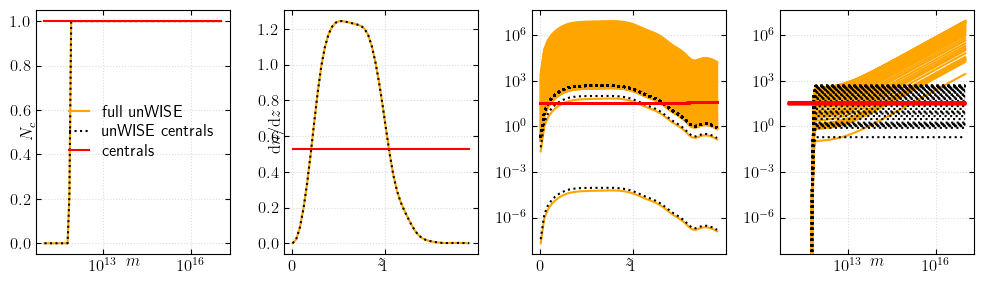

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(10, 3))

Ncs  = hcos.hods[unwise_color]['Nc']

ax[0].plot(ms, Ncs, color='orange', label='full unWISE')

Nss  = hcos.hods[unwise_color]['Ns']
dndz = get_dndzHOD(zs, pathdndz, dvols)
N_gtot = np.trapz(dndz, zs, axis=0)

ax[1].plot(zs, dndz/N_gtot, color='orange')

W_g  = dndz/N_gtot/dvols
ngal = np.trapz(nzm * (Ncs[None,:] + Nss[None,:]), ms, axis=-1)
Nczm = W_g[:,None] * (Ncs[None,:] + Nss[None,:]) / ngal[:,None]

for mi, mm in enumerate(ms):
    ax[2].plot(zs, dvols * Nczm[:, mi], color='orange')
for zi, zz in enumerate(zs):
    ax[3].plot(ms, dvols[zi] * Nczm[zi, :], color='orange')

    
Ncs  = hcos.hods[unwise_color]['Nc']

ax[0].plot(ms, Ncs, 'k:', label='unWISE centrals')

dndz = get_dndzHOD(zs, pathdndz, dvols)
N_gtot = np.trapz(dndz, zs, axis=0)

ax[1].plot(zs, dndz/N_gtot, 'k:')

W_g = dndz/N_gtot/dvols
ngalcentrals = np.trapz(nzm * Ncs[None,:], ms, axis=-1)
Nczm = W_g[:,None] * Ncs[None,:] / ngalcentrals[:,None]

for mi, mm in enumerate(ms):
    ax[2].plot(zs, dvols * Nczm[:, mi], 'k:')
for zi, zz in enumerate(zs):
    ax[3].plot(ms, dvols[zi] * Nczm[zi, :], 'k:')


#    Ncs  = np.ones(nMs)
#    dndz = np.ones(nZs)
#    N_gtot = np.trapz(dndz, zs, axis=0)
#    W_g = dndz / N_gtot / dvols
#    ngalcentrals = np.trapz(nzm * Ncs[None,:], ms, axis=-1)
#    Nczm = W_g[:,None] * Ncs[None,:] / ngalcentrals[:,None]

Ncs = np.ones(nMs)

ax[0].plot(ms, Ncs, 'r', label='centrals')

dndz = np.ones(nZs)
N_gtot = np.trapz(dndz, zs, axis=0)

ax[1].plot(zs, dndz/N_gtot, 'r')

W_g = dndz/N_gtot/dvols
ngalcentrals = np.trapz(nzm * Ncs[None,:], ms, axis=-1)
Nczm = W_g[:,None] * Ncs[None,:] / ngalcentrals[:,None]

for mi, mm in enumerate(ms):
    ax[2].plot(zs, dvols * Nczm[:, mi], 'r')
for zi, zz in enumerate(zs):
    ax[3].plot(ms, dvols[zi] * Nczm[zi, :], 'r')

ax[0].set_xscale('log')
ax[0].set_xlabel(r'$m$')
ax[0].set_ylabel(r'$N_c$')
ax[1].set_ylabel(r'${\rm d} n / {\rm d} z$')
ax[1].set_xlabel(r'$z$')
ax[2].set_xlabel(r'$z$')
ax[3].set_xlabel(r'$m$')
ax[3].set_xscale('log')
[aa.set_yscale('log') for aa in ax[2:]]
beautify(ax)
plt.tight_layout()
plt.show()

In [6]:
def get_tau_ma(MA):
    # B-field stuff from Cristina
    # See Table 1 of 2309.13104 for the halo properties for the given mass bins
    file_names = ['profile_bfld_halo_1e10_h12.txt', 'profile_bfld_halo_1e10_h11.txt', 'profile_bfld_halo_1e11_h10.txt', 
                  'profile_bfld_halo_1e11_h4.txt', 'profile_bfld_halo_1e12_h12.txt', 'profile_bfld_halo_1e13_h4.txt', 
                  'profile_bfld_halo_1e13_h8.txt']
    # file_names = ['profile_bfld_halo_'+str(i+1)+'.txt' for i in range(7)]# os.listdir('./data/bfield_profiles/')
    mass_bins = 10.**np.array([9.9, 10.4, 10.9, 11.4, 12, 12.5, 13])

    # Radial bins are the same for all of the files
    rad_bins   = np.genfromtxt('./data/profiles/'+file_names[0], skip_header=3, max_rows=1)
    rad_bins_c = rad_bins[:-1]+(rad_bins[1:]-rad_bins[:-1])/2.

    Bfiled_grid = np.zeros((len(mass_bins), 66, 23))
    logB_interp_list = []

    for i, file in enumerate(file_names):
        # in gauss
        Bfiled_grid[i] = np.genfromtxt('./data/profiles/'+file_names[i], skip_header=7).astype(float)

      #  logB_interp_list.append(RegularGridInterpolator((np.log10(Bfiled_grid[i][::, 0]), rad_bins_c), \
      #                                                   np.log10(Bfiled_grid[i][::, 3:]), \
      #                                                   bounds_error=False, fill_value=-10))
        logB_interp_list.append(RegularGridInterpolator((np.log10(np.concatenate( (Bfiled_grid[i][::8, 0], Bfiled_grid[i][-1:, 0]) )), rad_bins_c),
                                                         np.log10(np.concatenate( (Bfiled_grid[i][::8, 3:], Bfiled_grid[i][-1:, 3:]) )),
                                                         bounds_error=False, fill_value=-10 ))

    rcross = get_rcross_per_halo(zs, ms, rs, rvirs, rhocritz, deltav, cs, MA, pick_prof=True, name=AGN_name)
    prob   = conv_prob(zs, ms, rs, rvirs, rhocritz, deltav, cs, MA, rcross, logB_interp_list, mass_bins, rad_bins, pick_prof=True, rscale=rscale, name=AGN_name)
    utheta = prob_theta(zs, ms, rs, rvirs, rhocritz, deltav, cs, MA, rcross, logB_interp_list, mass_bins, rad_bins, pick_prof=True, rscale=rscale, name=AGN_name)

    u00    = get_u00(zs, chis, rcross)
    prob00 = prob * utheta * u00

    avtau, dtaudz = get_avtau(zs, ms, nzm, dvols, prob00)
    return avtau, dtaudz


In [7]:
# dtaudz_vec = []
# for mind, MA in enumerate(dictKey):
#     _, dtaudz = get_tau_ma(MA)
#     dtaudz_vec.append(dtaudz)
# np.save('/home/dpirvu/axion/data/dtaudz_vec_data.npy', dtaudz_vec)


In [8]:
#taumean = np.trapz(dtaudz_vec, zs, axis=1)
#np.save('./data/monopole.npy', [dictKey, taumean])


In [9]:
#ucosth, angs = get_halo_skyprofile(zs, chis, rcross)
#utest = get_uell0(angs, ucosth, 0)

#u00 = get_u00(zs, chis, rcross)*np.sqrt(4.*np.pi)
#print(np.count_nonzero([round(ii, 10) for ii in (utest - u00).flatten()]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(9000, 50)
(9000, 50)
(9000, 50)
(9000, 50)
(9000, 50)
(9000, 50)
(9000, 50)
(9000, 50)
(9000, 50)
(9000, 50)
(9000, 50)
(9000, 50)


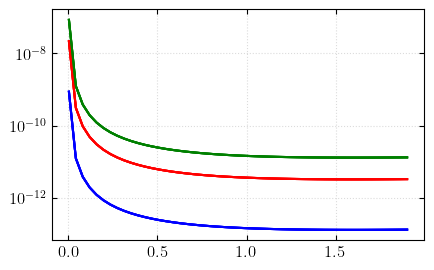

In [10]:
fig, ax = plt.subplots(1,1, figsize = (4.8,3.))

for mi, MA in enumerate(dictKey):
    if mi not in [25,31,33,35]: continue

    mm, mmm = 0, 9000
    ells = np.arange(mm,mmm)
    for ndoi, ndom in enumerate(ndomains):
        Clpol = get_gaussian_pol_1kp(zs, chis, 9000, ndom)
        print(np.shape(Clpol))
        plt.plot(zs, Clpol[500,:], color=['b', 'r', 'g'][ndoi], ms=2)

#ax.set_xscale('log')
ax.set_yscale('log')
legs, ax = beautify(ax)
plt.show()

In [11]:
ellMax = 3000
ells = np.arange(ellMax)

Ncs  = hcos.hods[unwise_color]['Nc']
dndz = get_dndzHOD(zs, pathdndz, dvols)
N_gtot = np.trapz(dndz, zs, axis=0)
W_g = dndz / N_gtot / dvols
ngalcentrals = np.trapz(nzm * Ncs[None, :], ms, axis=-1)
ugcen = W_g[:, None] * Ncs[None, :] / ngalcentrals[:, None]

Ncs  = np.ones(nMs)
dndz = np.ones(nZs)
N_gtot = np.trapz(dndz, zs, axis=0)
W_g = dndz / N_gtot / dvols
ngalcentrals = np.trapz(nzm * Ncs[None,:], ms, axis=-1)
ugcen2 = W_g[:,None] * Ncs[None,:] / ngalcentrals[:,None]

Clpol = get_gaussian_pol_1kp(zs, chis, ellMax, 5)

probell_pol1, probell_pol2, probell_pol3, probell_pol4 = np.zeros((4, len(dictKey), ellMax))
for mi, MA in enumerate(dictKey):
    path_params0 = np.asarray([MA, nZs, zMin, zMax, ellMax0, rscale])
    rcross, prob, utheta, avtau, dtaudz, uell0 = np.load(data_path(*path_params0))

    ct = np.sqrt((4.*np.pi)/(2.*ells[:ellMax]+1.))
    probell_pol = 3. * (prob[None,...] * uell0[:ellMax]) * ct[:,None,None]

    probell_pol1[mi] = np.trapz(dvols * np.trapz((nzm*utheta)[None,...] * np.abs(probell_pol)**2. , ms, axis=-1), zs, axis=-1)
    probell_pol2[mi] = np.trapz(dvols * np.trapz((nzm*utheta)[None,...] * np.abs(probell_pol)**2. , ms, axis=-1) * Clpol[:ellMax], zs, axis=-1)
    probell_pol3[mi] = np.trapz(dvols * np.trapz((nzm*utheta*ugcen)[None,...] * np.abs(probell_pol)**2. , ms, axis=-1), zs, axis=-1)
    probell_pol4[mi] = np.trapz(dvols * np.trapz((nzm*utheta*ugcen2)[None,...] * np.abs(probell_pol)**2. , ms, axis=-1), zs, axis=-1)

save = []
for mi, MA in enumerate(dictKey):
    if mi not in [30, 32, 34]: continue
    
    path_params0 = np.asarray([MA, nZs, zMin, zMax, ellMax0, rscale])
    rcross, prob, utheta, avtau, dtaudz, uell0 = np.load(data_path(*path_params0))

    ct = np.sqrt((4.*np.pi)/(2.*ells[:ellMax]+1.))
    probell_pol = 3. * (prob[None,...] * uell0[:ellMax]) * ct[:,None,None]

    save.append(dvols * np.trapz((nzm*utheta)[None,...] * np.abs(probell_pol)**2. , ms, axis=-1) * Clpol[:ellMax])
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


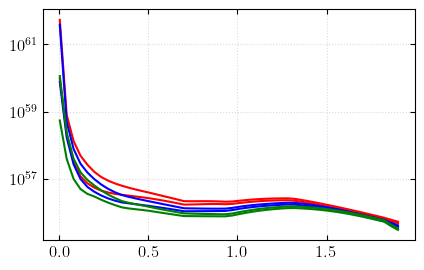

In [12]:
fig, ax = plt.subplots(1,1, figsize = (4.8,3.))

for mm,mi in enumerate([30, 32, 34]):
    MA = dictKey[mi]
    plt.plot(zs, save[mm][500], color=['r','b','g'][mm])
    plt.plot(zs, save[mm][2500], color=['r','b','g'][mm])

#ax.set_xscale('log')
ax.set_yscale('log')
legs, ax = beautify(ax)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


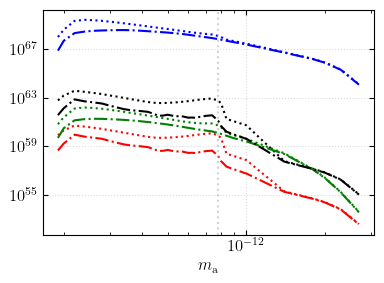

In [13]:
fig, ax = plt.subplots(1,1, figsize = (4.,3.))
colls = cycle(allcolors)

mss = np.arange(4, len(dictKey) - 20)
for li, ellchoose in enumerate([500,2000]):
    lss = [':','-.','--','-'][li]
    plt.plot(dictKey[mss], probell_pol1[mss,ellchoose], ls=lss, color='b')#, marker='o', ms=5)
    plt.plot(dictKey[mss], probell_pol2[mss,ellchoose], ls=lss, color='r')#, marker='o', ms=3)
    plt.plot(dictKey[mss], probell_pol3[mss,ellchoose], ls=lss, color='g')#, marker='o', ms=1)
    plt.plot(dictKey[mss], probell_pol4[mss,ellchoose], ls=lss, color='k')#, marker='o', ms=1)

plt.axvline(dictKey[32], ls=':', color='darkgray', alpha=0.5)
beautify(ax, times=-70, loc=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_{\rm a}$')
#plt.ylim((1e65,1e71))
plt.tight_layout()
plt.savefig('./plots/comparison_constr.pdf')
plt.show()


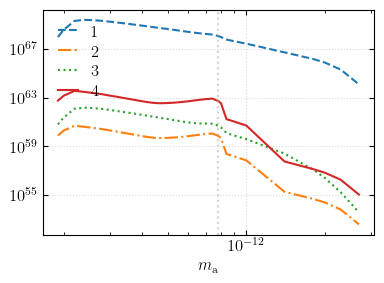

In [14]:
fig, ax = plt.subplots(1,1, figsize = (4.,3.))
colls = cycle(allcolors)

mss = np.arange(4, len(dictKey) - 20)
ellchoose = 500
lss = ['--','-.',':','-']

plt.plot(dictKey[mss], probell_pol1[mss,ellchoose], ls=lss[0], label=r'$1$')
plt.plot(dictKey[mss], probell_pol2[mss,ellchoose], ls=lss[1], label=r'$2$')
plt.plot(dictKey[mss], probell_pol3[mss,ellchoose], ls=lss[2], label=r'$3$')
plt.plot(dictKey[mss], probell_pol4[mss,ellchoose], ls=lss[3], label=r'$4$')

plt.axvline(dictKey[32], ls=':', color='darkgray', alpha=0.5)
beautify(ax, times=-70, loc=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_{\rm a}$')
#plt.ylim((1e65,1e71))
plt.tight_layout()
plt.savefig('./plots/comparison_constr.pdf')
plt.show()


7.4e-13 31


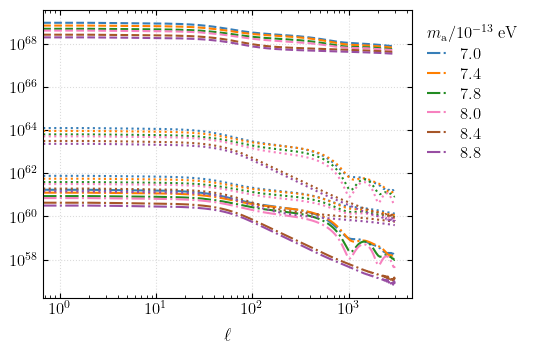

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5.5, 3.7))

print(7.4e-13, np.argmin(np.abs(dictKey - 7.4e-13)))

cych = cycle(allcolors)
for mind, MA in enumerate(dictKey):
    if mind not in np.arange(30, 36, 1): continue
    col=next(cych)
    lss = ['--','-.', ':','-']

    plt.plot(ells, probell_pol1[mind,:], color=col, ls=lss[0])
    plt.plot(ells, probell_pol2[mind,:], color=col, ls=lss[1], label=r'${:.1f}$'.format(MA/1e-13))
    plt.plot(ells, probell_pol3[mind,:], color=col, ls=lss[2])
    plt.plot(ells, probell_pol4[mind,:], color=col, ls=lss[2])

ax.ticklabel_format(axis='y', style='scientific', scilimits=[0.,0.])

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$\ell$', fontsize=13)
beautify(ax, times=-70, ttl=r'$m_{\rm a} / 10^{-13} {\rm \; eV}$', bb=(1,1))
plt.tight_layout()
#plt.savefig('./plots/dtaudz.pdf')
plt.show()


In [16]:
del probell_pol1, probell_pol2, probell_pol3, probell_pol4

In [17]:
def testt(lMax, lshortlist, Blmixx, TCMB):
    Lscr1 = np.arange(2, lMax)

    scrbispBBg  = np.zeros((lMax, np.shape(Blmixx)[-1]))
    for ind, l1 in enumerate(Lscr1):
        w000   = wigner.wigner_3jj(l1, l1, 0, 0)
        cm, dm = max(2, int(w000[0])), min(int(w000[1]), lMax-1)
        l000   = np.arange(cm, dm+1)
        cw, dw = int(cm - w000[0]), int(dm - w000[0])

        norm  = (2.*l1+1.) * (2.*l1+1.) / (4.*np.pi)
        mix   = norm * np.abs(w000[2][cw:dw+1])**2.

        lo1  = np.argmin(np.abs(lshortlist - l1))
        Bell = Blmixx[lo1, lo1]

        scrbispBBg[l000,:] += Bell[None,:] * mix[:,None]
    return scrbispBBg * TCMB**2.



In [18]:
mind = 31
MA = dictKey[mind]
print(MA)

# This is the unWISE survey template containing only central galaxys; function of z2 and m2
Ncs  = hcos.hods[unwise_color]['Nc']
dndz = get_dndzHOD(zs, pathdndz, dvols)
N_gtot = np.trapz(dndz, zs, axis=0)
W_g = dndz / N_gtot / dvols
ngalcentrals = np.trapz(nzm * Ncs[None, :], ms, axis=-1)
ugcen = W_g[:, None] * Ncs[None, :] / ngalcentrals[:, None]

path = ILCnoisePS_path(MA, nZs, zMin, zreio, ellMax0, 'Planck')
leftover = np.load(path)

path = cl_data_galgal_path(nZs, zMin, zreio, ellMax0, AGN_name, unwise_color, choose_dict) + 'centrals_only_unWISE.npy'
Cell_galgal = np.load(path)

Npc = 5
loaded = np.load(BBg_1h_bispectrum_constraint(MA, nZs, zMin, zreio, 3000, Npc, 'Planck', unwi=True))
print(loaded)

ellMax = 3000
ells = np.arange(ellMax)

ellshort = np.array([0.] + np.linspace(2, ellMax-1, ellMax//12+1).tolist())
ellshort = np.array([int(ii) for ii in ellshort])
ellshort = np.array(list(dict.fromkeys(ellshort)))

ellshortshort = np.array([0.] + np.geomspace(2, ellMax-1, 101).tolist())
ellshortshort = np.array([int(ii) for ii in ellshortshort])
ellshortshort = np.array(list(dict.fromkeys(ellshortshort)))


rcross, prob, utheta, avtau, dtaudz, uell0 = np.load(data_path(*path_params0))

ct = np.sqrt((4.*np.pi)/(2*ells+1))
probell_pol = 3. * (prob[None,...] * uell0)[:ellMax,...] * ct[:, None, None]

probcross = np.abs(probell_pol[ellshort,None,:,:] * probell_pol[None,ellshort,:,:])
integrBB = np.trapz( (nzm * utheta * ugcen)[None,None,:,:] * probcross, ms, axis=-1)

Bispec = testt(ellMax, ellshort, integrBB, TCMB)

Clpol = get_gaussian_pol_1kp(zs, chis, ellMax, Npc)

Bispec = Bispec[None,...] * Clpol[ellshortshort,None,:]
Bispec = np.trapz(dvols[None,None,:] * Bispec, zs, axis=-1)

xg, yg = np.meshgrid(ells, ells, indexing='ij', sparse=True)
f = RegularGridInterpolator((ellshortshort, ells), Bispec)
Bispec = f((xg, yg)) * units**2.

constr = get_1h_bispectrum_constraint(fsky, 4, 1000, leftover[2], Cell_galgal, Bispec)
print(constr)


7.4e-13
2.2249656693329107e-20
7.62842083065792e-19


24 5.8e-13
24 5.8e-13
24 5.8e-13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


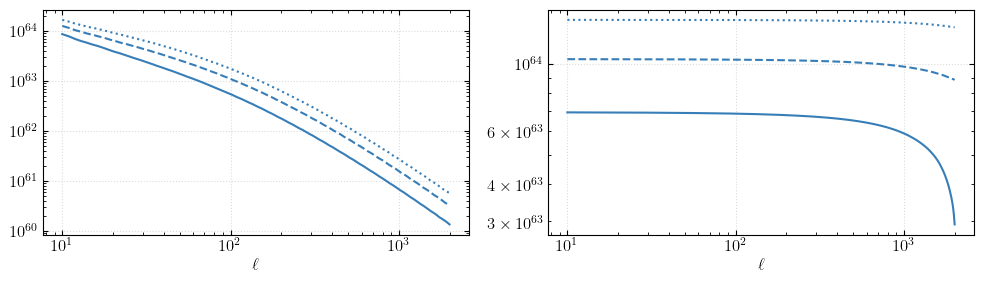

In [19]:
#fig, ax = plt.subplots(1,3, figsize = (15.,3.))
fig2, ax2 = plt.subplots(1,2, figsize = (10.,3.))

for elt, ellMax in enumerate([2000, 4000, 8000]):
    ellshort = np.array([0.] + np.geomspace(2, ellMax-1, 51).tolist())
    ellshort = np.array([int(ii) for ii in ellshort])
    ellshort = np.array(list(dict.fromkeys(ellshort)))
    
    lss = ['-','--',':'][elt]

    cych = cycle(allcols)
    for mind, MA in enumerate(dictmasses):
     #   if mind not in [20, 22, 24, 26, 28]: continue
        if mind !=24: continue
        print(mind, MA)
        col = next(cych)

        mm, mmm = 10, 2000

        zMin, zMax, rMin, rMax = chooseModel(MA, model)
        zMax = min(zreio, zMax)

        for ndoi, ndom in enumerate(ndomains):
            if ndoi!=1: continue

            Bellred = np.load(fullscr_reducedbisp_tautau_path(MA, nZs, zMin, zreio, ellMax, rscale, ndom)+'_unWISE.npy')
            ells, ells0 = np.arange(mmm), np.arange(ellMax)
            xg, yg  = np.meshgrid(ells, ells, indexing='ij', sparse=True)
            f       = RegularGridInterpolator((ellshort, ells0), Bellred)
            Bellred = f((xg, yg)) * units**2.

            li = 9
            eli = ellshort[li]

            ax2[0].plot(np.arange(mm,mmm), Bellred[mm:mmm,eli   ], color=col, ls=lss)
            ax2[1].plot(np.arange(mm,mmm), Bellred[eli,   mm:mmm], color=col, ls=lss)

[aa.set_yscale('log') for aa in ax2]
[aa.set_xscale('log') for aa in ax2]
[aa.set_xlabel(r'$\ell$') for aa in ax2]
ax2 = beautify(ax2, times=-70)
fig2.tight_layout()
fig2.show()

In [20]:
if compute_noise:
    for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
        if expname == 'Planck':
            elllim = 4000
            Nell, Fell = get_noise_and_foregrounds_Planck(TCMB, elllim_Planck=elllim, nfreqs_Planck=nfreqs)

        elif expname == 'CMBS4':
            elllim = 9000
            Nell, Fell = get_noise_and_foregrounds_S4(TCMB, elllim_S4=elllim, nfreqs_S4=nfreqs)

        for mind, MA in enumerate(dictmasses):
            zMin, zMax, rMin, rMax = chooseModel(MA, model)
            zMax = min(zreio, zMax)

            ndoi = 1
            ndom = ndomains[ndoi]

            for doforegs in [True, False]:
                if doforegs:
                    foregs = Fell
                    patha = weights_path(MA, nZs, zMin, zreio, ellMax0, expname)
                    pathb = ILCnoisePS_path(MA, nZs, zMin, zreio, ellMax0, expname)
                else:
                    foregs = Nell
                    patha = weights_path(MA, nZs, zMin, zreio, ellMax0, expname)+'_nofg.npy'
                    pathb = ILCnoisePS_path(MA, nZs, zMin, zreio, ellMax0, expname)+'_nofg.npy'

                Cell1Halo, Cell2Halo = np.load(cl_data_tautau_path(MA, nZs, zMin, zMax, ellMax0, rscale))
                scrTT = (Cell1Halo + Cell2Halo) * TCMB**2.

                scrEE = np.load(fullscr_polaxion_tautau_path(MA, nZs, zMin, zMax, 9000, rscale, ndom))
                CMBDP = np.array([scrTT[:elllim], scrEE[:elllim], scrEE[:elllim]])

                epsilon = 0.
                screen = epsilon**4. * CMBDP * units**2.
                del epsilon
                reco   = lensedCMB.T[:3,:elllim]

                weights, leftoverdata = get_ILC_noise(elllim, units, screen, foregs, reco, experiment, nspec, nfreqs)

                np.save(patha, weights)
                np.save(pathb, leftoverdata)
        print(expname, 'done')

#### Contour Plot

In [21]:
if False:
    for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
        # magnetic domains, #masses sampled, #forecast methods
        test = np.ones((len(ndomains), len(dictmasses), 2))/1e11

        for mind, MA in enumerate(dictmasses):
            for ndoi, ndom in enumerate(ndomains):
                zMin, zMax, rMin, rMax = chooseModel(MA, model)
                zMax = min(zreio, zMax)

                path2h = bispectrum_constraint(MA, nZs, zMin, zreio, 6000, ndom, expname, unwi=True)
                if ndoi==1 and eind==0 and mind>36:
                    print(path2h)
                    test[ndoi, mind, 0] = np.load(path2h)
                try:
                    test[ndoi, mind, 0] = np.load(path2h)
                except:
                    test[ndoi, mind, 0] = 'nan'

                path2h = bispectrum_constraint(MA, nZs, zMin, zreio, 8000, ndom, expname, unwi=True)
                try:
                    test[ndoi, mind, 1] = np.load(path2h)
                except:
                    test[ndoi, mind, 1] = 'nan'


In [22]:
if get_constraints:
    for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
        # magnetic domains, #masses sampled, #forecast methods
        sigmaEpsilonList = np.ones((len(ndomains), len(dictmasses), 4))/1e11

        if expname=='Planck':
            mm, mmm = 4, 3000
        if expname=='CMBS4':
            mm, mmm = 4, 6000

        for mind, MA in enumerate(dictmasses):
            for ndoi, ndom in enumerate(ndomains):
                zMin, zMax, rMin, rMax = chooseModel(MA, model)
                zMax = min(zreio, zMax)

                leftover = np.load(ILCnoisePS_path(MA, nZs, zMin, zreio, ellMax0, expname))

                Cell_gg_tot = np.load(cl_data_galgal_path(nZs, zMin, zreio, ellMax0, name=AGN_name, galcol=unwise_color, dictn=choose_dict))

                Cell_taug_tot = np.load(cl_data_galtau_path(MA, nZs, zMin, zreio, ellMax0, name=AGN_name, galcol=unwise_color, dictn=choose_dict))
                Cell_taug_tot = Cell_taug_tot * TCMB * units

                Cell1Halo, Cell2Halo = np.load(cl_data_tautau_path(MA,nZs,zMin,zMax,ellMax0,rscale))

                scrTT = (Cell1Halo + Cell2Halo) * TCMB**2.
                scrEE = np.load(fullscr_polaxion_tautau_path(MA, nZs, zMin, zMax, 9000, rscale, ndom))
                screening = np.array([scrTT[:mmm], scrEE[:mmm], scrEE[:mmm]]) * units**2.

                # first constraint: CMB screening TT only
                sigmaEpsilonList[ndoi, mind, 0] = sigma_screening_TT(0., fsky, mm, mmm, screening, leftover)

                # first constraint: CMB screening BB only
                sigmaEpsilonList[ndoi, mind, 1] = sigma_screening_BB(0., fsky, mm, mmm, screening, leftover)

                # first constraint: CMB auto and unWISE
                sigmaEpsilonList[ndoi, mind, 2] = sigma_screeningVunWISE(0., fsky, mm, mmm, screening, leftover, Cell_taug_tot, Cell_gg_tot)

                path2h = bispectrum_constraint(MA, nZs, zMin, zreio, 8000, ndom, expname, unwi=True)
                path1h = BBg_1h_bispectrum_constraint(MA, nZs, zMin, zreio, mmm, ndom, expname, unwi=True)
                try:
                    sigmaEpsilonList[ndoi, mind, 3] = np.load(path1h) + np.load(path2h)
                except:
                    sigmaEpsilonList[ndoi, mind, 3] = 'nan'

        np.save('/home/dpirvu/axion/data/constraints_data'+expname+'.npy', sigmaEpsilonList*1e9)
    print('Done')

Done


In [23]:
if True:
    for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
        # magnetic domains, #masses sampled, #forecast methods
        sigmaEpsilonList = np.ones((len(ndomains), len(dictmasses), 7))/1e11

        if expname=='Planck':
            mm, mmm = 4, 3000
        if expname=='CMBS4':
            mm, mmm = 4, 6000

        for mind, MA in enumerate(dictmasses):
            for ndoi, ndom in enumerate(ndomains):
                zMin, zMax, rMin, rMax = chooseModel(MA, model)
                zMax = min(zreio, zMax)

                leftover = np.load(ILCnoisePS_path(MA, nZs, zMin, zreio, ellMax0, expname))

                Cell_gg_tot = np.load(cl_data_galgal_path(nZs, zMin, zreio, ellMax0, name=AGN_name, galcol=unwise_color, dictn=choose_dict))

                Cell_taug_tot = np.load(cl_data_galtau_path(MA, nZs, zMin, zreio, ellMax0, name=AGN_name, galcol=unwise_color, dictn=choose_dict))
                Cell_taug_tot = Cell_taug_tot * TCMB * units

                Cell1Halo, Cell2Halo = np.load(cl_data_tautau_path(MA,nZs,zMin,zMax,ellMax0,rscale))

                scrEE = np.load(fullscr_polaxion_tautau_path(MA, nZs, zMin, zMax, 9000, rscale, ndom))
                screening = np.array([(Cell1Halo)[:mmm] * TCMB**2., scrEE[:mmm], scrEE[:mmm]]) * units**2.
                sigmaEpsilonList[ndoi, mind, 0] = sigma_screening_TT(0., fsky, mm, mmm, screening, leftover)

                scrEE = np.load(fullscr_polaxion_tautau_path(MA, nZs, zMin, zMax, 9000, rscale, ndom))
                screening = np.array([(Cell2Halo)[:mmm] * TCMB**2., scrEE[:mmm], scrEE[:mmm]]) * units**2.
                sigmaEpsilonList[ndoi, mind, 1] = sigma_screening_TT(0., fsky, mm, mmm, screening, leftover)

                pathTTg_unwi = TTg_1h_bispectrum_constraint(MA, nZs, zMin, zreio, mmm, expname, unwi=True)
                try:
                    sigmaEpsilonList[ndoi, mind, 2] = np.load(pathTTg_unwi)
                except:
                    sigmaEpsilonList[ndoi, mind, 2] = 'nan'

                pathTTg_gen = TTg_1h_bispectrum_constraint(MA, nZs, zMin, zreio, mmm, expname, unwi=True)+'all_centrals.npy'
                try:
                    sigmaEpsilonList[ndoi, mind, 3] = np.load(pathTTg_gen)
                except:
                    sigmaEpsilonList[ndoi, mind, 3] = 'nan'

                path = BBg_1h_bispectrum_constraint(MA, nZs, zMin, zreio, mmm, ndom, expname, unwi=True)
                try:
                    sigmaEpsilonList[ndoi, mind, 4] = np.load(path)
                except:
                    sigmaEpsilonList[ndoi, mind, 4] = 'nan'

                path = bispectrum_constraint(MA, nZs, zMin, zreio, 8000, ndom, expname, unwi=True)
                try:
                    sigmaEpsilonList[ndoi, mind,5] = np.load(path)
                except:
                    sigmaEpsilonList[ndoi, mind,5] = 'nan'

                scrEE = np.load(fullscr_polaxion_tautau_path(MA, nZs, zMin, zMax, 9000, rscale, ndom))
                screening = np.array([(Cell1Halo + Cell2Halo)[:mmm] * TCMB**2., scrEE[:mmm], scrEE[:mmm]]) * units**2.
                sigmaEpsilonList[ndoi, mind, 6] = sigma_screening_BB(0., fsky, mm, mmm, screening, leftover)

        np.save('/home/dpirvu/axion/data/constraints_data2'+expname+'.npy', sigmaEpsilonList*1e9)
    print('Done')

Done
